### packages 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
from spacy.lang.da.stop_words import STOP_WORDS

In [34]:
#uffe csv-fil
uffe = pd.read_csv('Elbaek_got.csv', index_col=0)

In [39]:
uffe.head()

,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
date,,,,,,,,,,,
2019-10-18 10:09:28,uffeelbaek,NaN,0,3,9,Nuanceret og grundig (og forholdsvis kort) gen...,NaN,NaN,#dkpolhttps,1185135803338575872,https://twitter.com/uffeelbaek/status/11851358...
2019-10-18 07:58:06,alternativet_,NaN,2,4,13,“Der bør signaleres tydeligt her og laves et g...,NaN,@rasmusnordqvist,#dkpol,1185102742836142080,https://twitter.com/alternativet_/status/11851...
2019-10-18 07:55:33,alternativet_,NaN,1,3,10,Stop ny oliejagt i Nordsøen. Det vil være dårl...,NaN,NaN,#dkpol #dkgreen,1185102101640351745,https://twitter.com/alternativet_/status/11851...
2019-10-17 20:13:06,uffeelbaek,FrejElbaek,0,0,12,"Kunne ikke have sagt det bedre selv, Frej. Kæm...",NaN,NaN,NaN,1184925321457524736,https://twitter.com/uffeelbaek/status/11849253...
2019-10-17 20:10:03,uffeelbaek,bille_nanna,2,0,1,"Det er ikke min oplevelse. Jeg ser unge, voksn...",NaN,NaN,NaN,1184924555435020289,https://twitter.com/uffeelbaek/status/11849245...


In [37]:
#wordcloud over uffes tweets
alltext = ""
for tweet in uffe.text:
    try: 
        tweet = tweet.split("https")[0]
    except AttributeError: 
        continue
    alltext = alltext + " " + tweet

In [51]:
allwords = re.split(r'\W+', alltext)

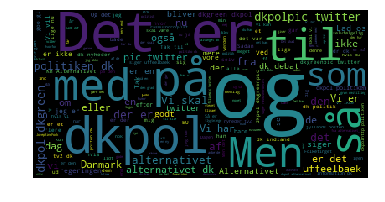

In [62]:
wordcloud = WordCloud().generate(alltext)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off", interpolation='bilinear')
plt.show()

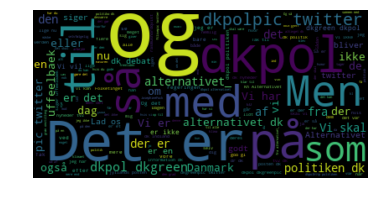

In [49]:
#Wordcloud over allwords_uffe
wordcloud = WordCloud().generate(' '.join(allwords))

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

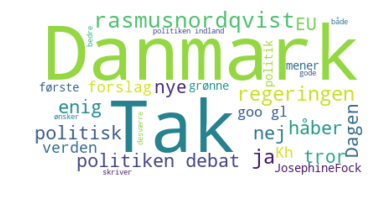

In [75]:
#Wordcloud med stopwords
stopwords = set(STOP_WORDS)
stopwords.update(['dkgreenpic', 'to','dk', 'pic', 'selvfølgelig', 'morgen', 'får', 'dkgreen', 'dkpolpic', 'godt', 'alternativet', 'Alternativet', 'uffeelbaek','dkpol', 'twitter', 'alternativet_', 'http', 'com', 'www', 'helt', 'klar', 'se', 'bare', 'gerne', 'når', 'brug', 'står', 'går', 'år', 'læs', 'ser', 'gang', 'dag', 'siger'])
wordcloud_recon = WordCloud(stopwords=stopwords, background_color="white", max_words=30).generate(' '.join(allwords))

plt.figure()
plt.imshow(wordcloud_recon, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
allwords.count('dkpol')

6144

In [119]:
#fjern NaN fra hashtagkolonnen
hashtags_cleaned = uffe['hashtags'].dropna().astype(str).tolist()

In [115]:
#alltags, split http og opdel hashtags
alltags = ""
for hashtags in hashtags_cleaned:
        hashtags = hashtags.split("https")[0]
        alltags = alltags + " " + hashtags
print(alltags)

 #dkpol #dkpol #dkpol #dkgreen #dkpol #StandWithHongKong #dkpol #dkpol #dkpol #StandwithHK #eye4hk #dkpol #dkgreen #fl20 #dkpol #ExtinctionRebellion #dkpolpic #FarRight #dkpol #edwardsnowden #surveillance #dkpol #dkpol #dkgreen #dkpol #ClimateCrisis #dkpol #catalanreferendum #dkpol #dkpol #dkpol #dkpol #StandWithHongKong #eye4hk #dkpol #dkpol #dkpol #dkpol #exstinctionrebellionpic #marathonrunnerpic #dkpol #dkgreen #ClimateAction #C40Summit #TheFutureWeWant #dkpol #dkgreenpic #C40Summit #TheFutureWeWant #dkpol #dkgreenpic #dkpol #dkpol #plantbasedpic #dkpol #dkgreen #C40Summit #dkpol #dkgreen #TheFutureWeWant #dkpol #dkgreen #keepitintheground #StandWithHongKong #Eye4HK #dkpol #dkpol #dkpol #dkgreen #dkpol #dkpol #kbhpol #dkpol #dkpol #dkpol #dkpol #dkgreen #Erdogan #Kurdistan #dkpol #Erdogan #Kurdistan #dkpol #dkpol #dkpol #dkpol #dkgreen #dkpol #dkgreen #dknatur #dkpol #dkgreen #dkpol #dkpol #dkpolpic #dkpol #freekurdistan #dkpolpic #StandWithHongKong #eye4hk #dkpol #dkgreen #dkpol #

In [121]:
alltags.count('#dkpol')

9168

In [ ]:
#wordcloud over hashtags
hashtags = uffe.hashtags()
